In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer, LabelEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
sns.set(style="ticks")

In [180]:
# Загрузка датасета
data=pd.read_csv('avocado.csv', sep=",")

In [181]:
# Размер набора данных
data.shape

(18249, 14)

In [182]:
# Типы колонок
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [183]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [184]:
# Основные статистические характеристки набора данных
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [185]:
# Проверка наличия пропущенных значений
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [186]:
# Кодирование категориальных признаков (object)
le=LabelEncoder()
le.fit(data.Date)
data['Date']=le.transform(data.Date)

In [187]:
le=LabelEncoder()
le.fit(data.type)
data['type']=le.transform(data.type)

In [188]:
le=LabelEncoder()
le.fit(data.region)
data['region']=le.transform(data.region)

In [189]:
# Типы колонок
data.dtypes

Unnamed: 0        int64
Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [190]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [191]:
# Масштабирование данных
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['AveragePrice']])

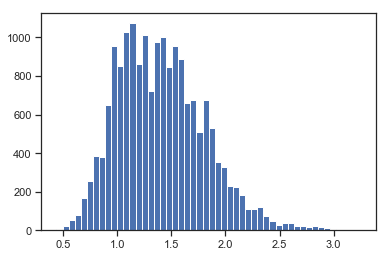

In [192]:
plt.hist(data['AveragePrice'], 50)
plt.show()

In [193]:
# Построение корреляционной матрицы
data.corr()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.419926,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
Date,-0.419926,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,-0.133008,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,0.017628,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,0.019829,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,0.041752,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768


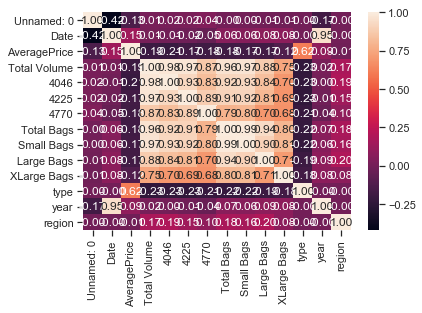

In [194]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [195]:
# Определим уникальные значения для целевого признака
data['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

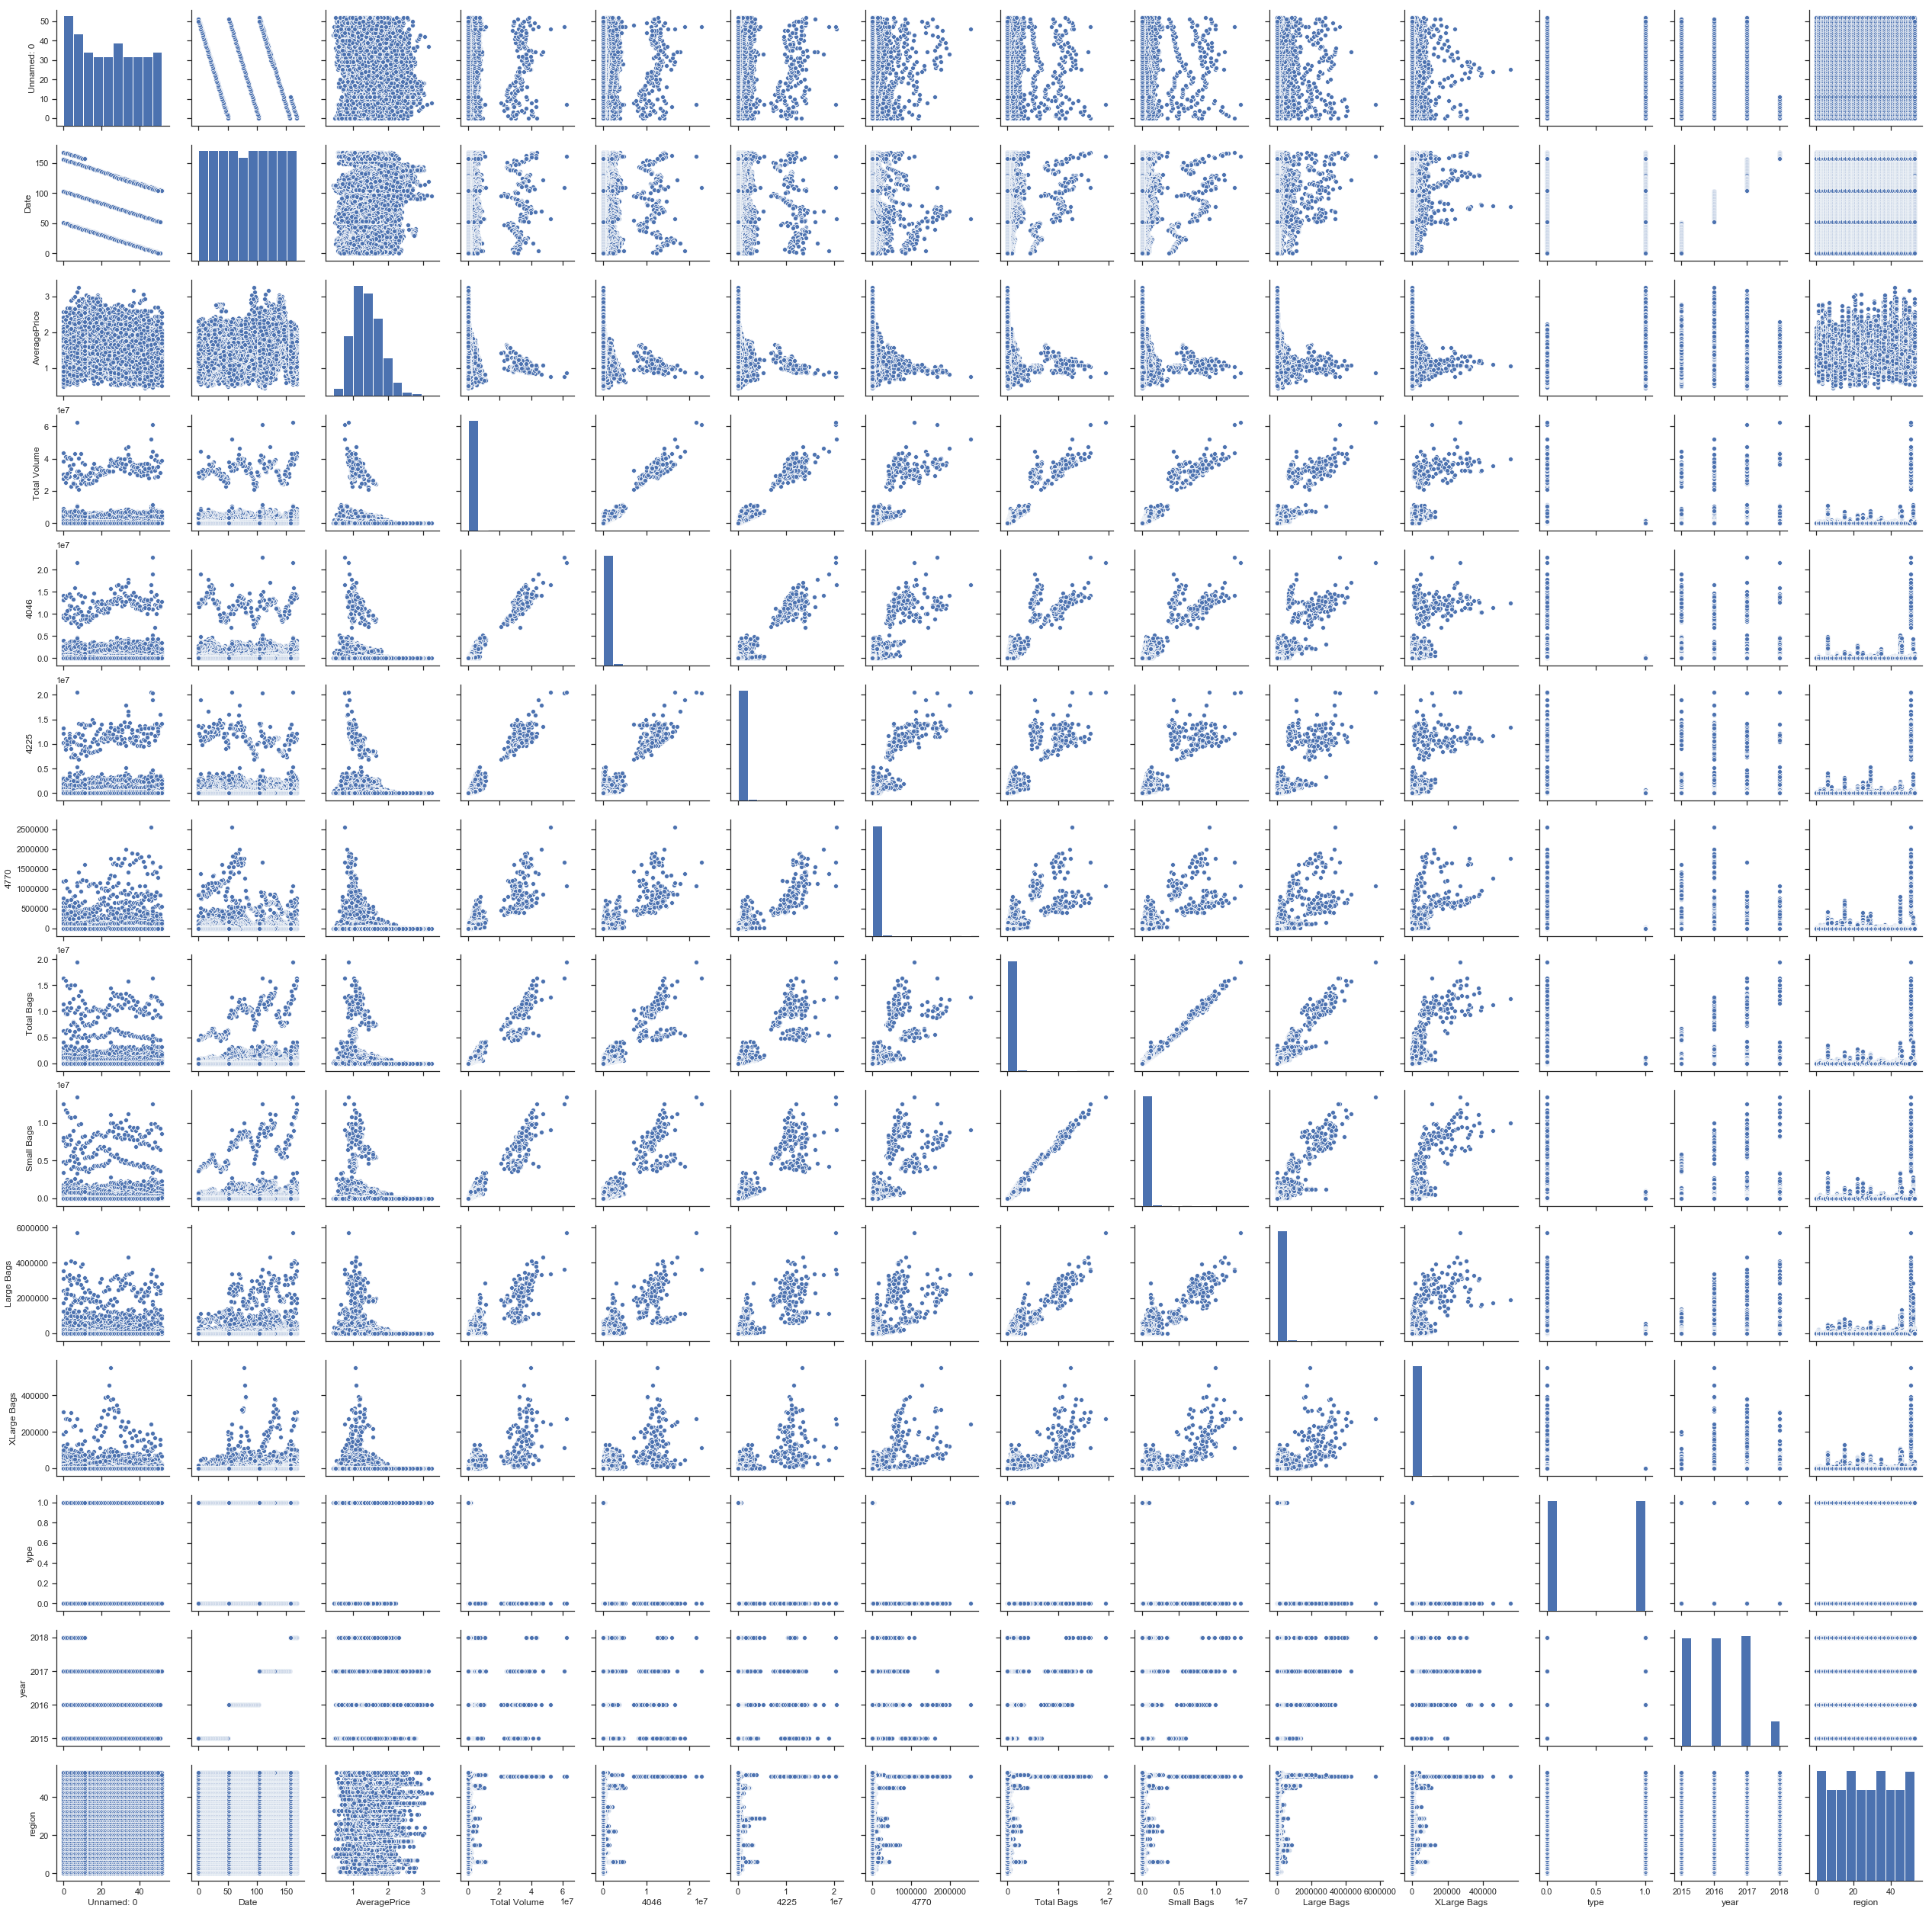

In [196]:
# Парные диаграммы (на пересечениях - диаграммы рассеивания, на главной диагонали - гистограммы распределения)
sns.pairplot(data)

In [197]:
# Разделим выборку на обучающую и тестовую
# X_train - обучающая выборка (матрица объект-признак)
# y_train - обучающая выборка (вектор целевого признака)
# X_test - тестовая выборка (матрица объект-признак)
# y_test - тестовая выборка (вектор целевого признака)

X_train, X_test, y_train, y_test = train_test_split(
    data, data['year'], test_size= 0.5, random_state= 1)

In [198]:
# Размер обучающей выборки
X_train.shape, y_train.shape

((9124, 14), (9124,))

In [199]:
# Размер тестовой выборки
X_test.shape, y_test.shape

((9125, 14), (9125,))

In [200]:
# Обучение линейной модели
sgd = SGDClassifier().fit(X_train, y_train)

C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [201]:
# Стохастический градиентный спуск
target_sgd = sgd.predict(X_test)

In [202]:
scores_sgd = cross_val_score(SGDClassifier(), 
                         X_train, y_train, cv=2)
scores_sgd

C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([0.46175762, 0.47423811])

In [203]:
parameters = {'alpha':[0.5,0.4,0.3,0.2,0.1]}
clf_gs_sgd = GridSearchCV(SGDClassifier(), parameters, cv=2, scoring='accuracy')
clf_gs_sgd.fit(X_train, y_train)

C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and 

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.5, 0.4, 0.3, 0.2, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [204]:
# Лучшие значения параметров
clf_gs_sgd.best_params_

{'alpha': 0.2}

In [205]:
# Подставим лучшие значения параметров: alpha = 0.2
sgd2 = SGDClassifier(alpha=0.1).fit(X_train, y_train)

C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [206]:
target_sgd2 = sgd2.predict(X_test)

In [207]:
# Cравнение точности 
accuracy_score(y_test, target_sgd), \
precision_score(y_test, target_sgd, average='micro'), \
recall_score(y_test, target_sgd, average='micro')

(0.45052054794520546, 0.45052054794520546, 0.45052054794520546)

In [208]:
accuracy_score(y_test, target_sgd2), \
precision_score(y_test, target_sgd2, average='micro'), \
recall_score(y_test, target_sgd2, average='micro')

(0.48, 0.48, 0.48)

In [209]:
# Дерево решений
tree = DecisionTreeClassifier(random_state=1, min_impurity_decrease=0.5, max_depth=0.75).fit(X_train, y_train)

In [210]:
target_tree = tree.predict(X_test)

In [211]:
scores_decision_tree = cross_val_score(DecisionTreeClassifier(), 
                         X_train, y_train, cv=2)
scores_decision_tree

array([1., 1.])

In [212]:
parameters = {'min_impurity_decrease':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]}
clf_gs_decision_tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv=2, scoring='accuracy')
clf_gs_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_impurity_decrease': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [213]:
# Лучшие значения параметров
clf_gs_decision_tree.best_params_

{'min_impurity_decrease': 0.1}

In [214]:
# Подставим лучшие значения параметров: min_impurity_decrease = 0.1
tree2 = DecisionTreeClassifier(random_state=1, min_impurity_decrease=0.1, max_depth=0.75).fit(X_train, y_train)

In [215]:
target_tree2 = tree2.predict(X_test)

In [216]:
# Cравнение точности 
accuracy_score(y_test, target_tree), \
precision_score(y_test, target_tree, average='micro'), \
recall_score(y_test, target_tree, average='micro')

(0.3148493150684932, 0.3148493150684932, 0.3148493150684932)

In [217]:
accuracy_score(y_test, target_tree2), \
precision_score(y_test, target_tree2, average='micro'), \
recall_score(y_test, target_tree2, average='micro')

(0.3148493150684932, 0.3148493150684932, 0.3148493150684932)

In [218]:
# Случайный лес
randomforest = RandomForestClassifier(n_estimators=5, max_depth=1, random_state=0).fit(X_train, y_train)

In [219]:
target_randomforest = randomforest.predict(X_test)

In [220]:
parameters_random_forest = {'n_estimators':[1, 3, 5, 7, 10], 
                            'max_depth':[1, 3, 5, 7, 10],
                            'random_state':[0, 2, 4, 6, 8, 10]}
best_random_forest = GridSearchCV(RandomForestClassifier(), parameters_random_forest, cv=3, scoring='accuracy')
best_random_forest.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 3, 5, 7, 10], 'max_depth': [1, 3, 5, 7, 10], 'random_state': [0, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [221]:
# Лучшие значения параметров
best_random_forest.best_params_

{'max_depth': 5, 'n_estimators': 3, 'random_state': 2}

In [222]:
# Подставим лучшие значения параметров: max_depth = 5, n_estimators = 3, random_state = 2
randomforest2 = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=2).fit(X_train, y_train)

In [223]:
target_randomforest2 = randomforest2.predict(X_test)

In [224]:
# Cравнение точности 
accuracy_score(y_test, target_randomforest), \
precision_score(y_test, target_randomforest, average='micro'), \
recall_score(y_test, target_randomforest, average='micro')

(0.6431780821917809, 0.6431780821917809, 0.6431780821917809)

In [225]:
accuracy_score(y_test, target_randomforest2), \
precision_score(y_test, target_randomforest2, average='micro'), \
recall_score(y_test, target_randomforest2, average='micro')

(1.0, 1.0, 1.0)

In [226]:
# Градиентный бустинг
gradient_boosting = GradientBoostingClassifier(n_estimators=5, max_depth=1, learning_rate=0.01).fit(X_train, y_train)

In [227]:
target_gradient_boosting = gradient_boosting.predict(X_test)

In [228]:
parameters_gradient_boosting = {'n_estimators':[1, 3, 5, 7, 10], 
                                'max_depth':[1, 3, 5, 7, 10],
                                'learning_rate':[0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025]}
best_gradient_boosting = GridSearchCV(GradientBoostingClassifier(), parameters_gradient_boosting, cv=3, scoring='accuracy')
best_gradient_boosting.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 3, 5, 7, 10], 'max_depth': [1, 3, 5, 7, 10], 'learning_rate': [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [229]:
# Лучшие значения параметров
best_gradient_boosting.best_params_

{'learning_rate': 0.0075, 'max_depth': 3, 'n_estimators': 10}

In [230]:
# Подставим лучшие значения параметров: learning_rate = 0.0075, max_depth = 3, n_estimators = 10
gradient_boosting2 = GradientBoostingClassifier(n_estimators=10, max_depth=3, learning_rate=0.0075).fit(X_train, y_train)

In [231]:
target_gradient_boosting2 = gradient_boosting2.predict(X_test)

In [232]:
# Cравнение точности 
accuracy_score(y_test, target_gradient_boosting), \
precision_score(y_test, target_gradient_boosting, average='micro'), \
recall_score(y_test, target_gradient_boosting, average='micro')

(0.930958904109589, 0.930958904109589, 0.930958904109589)

In [233]:
accuracy_score(y_test, target_gradient_boosting2), \
precision_score(y_test, target_gradient_boosting2, average='micro'), \
recall_score(y_test, target_gradient_boosting2, average='micro')

(1.0, 1.0, 1.0)

In [234]:
# Метод ближайших соседей
simple_knn = KNeighborsClassifier(n_neighbors=2)

In [235]:
simple_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [236]:
target_1 = simple_knn.predict(X_test)

In [237]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'n_neighbors': n_range}]
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, 
                      cv=StratifiedKFold(n_splits=5), scoring='accuracy')
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [238]:
# Лучшие значения параметров
clf_gs.best_params_

{'n_neighbors': 4}

In [239]:
# Подставим лучшие значения параметров: n_neighbors = 4
simple_knn2 = KNeighborsClassifier(n_neighbors=4)

In [240]:
simple_knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [241]:
target_2 = simple_knn2.predict(X_test)

In [242]:
# Cравнение точности 
accuracy_score(y_test, target_1), \
precision_score(y_test, target_1, average='micro'), \
recall_score(y_test, target_1, average='micro')

(0.6362739726027398, 0.6362739726027398, 0.6362739726027398)

In [243]:
accuracy_score(y_test, target_2), \
precision_score(y_test, target_2, average='micro'), \
recall_score(y_test, target_2, average='micro')

(0.6368219178082192, 0.6368219178082192, 0.6368219178082192)

In [244]:
# Построение кривых обучения
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and 

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

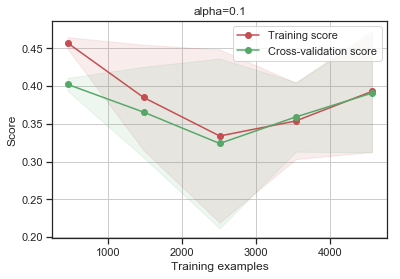

In [245]:
# Кривая обучения - Стохастический градиентный спуск
plot_learning_curve(SGDClassifier(alpha=0.1), 'alpha=0.1', 
                    X_train, y_train, cv=2)

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

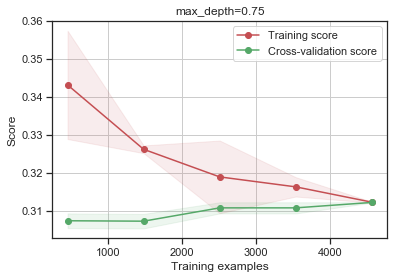

In [246]:
# Кривая обучения - Дерево решений
plot_learning_curve(DecisionTreeClassifier(random_state=1, min_impurity_decrease=0.1, max_depth=0.75), 'max_depth=0.75', 
                    X_train, y_train, cv=2)

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

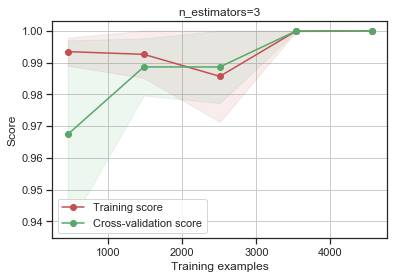

In [247]:
# Кривая обучения - Случайный лес
plot_learning_curve(RandomForestClassifier(n_estimators=3, max_depth=5, random_state=2), 'n_estimators=3', 
                    X_train, y_train, cv=2)

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

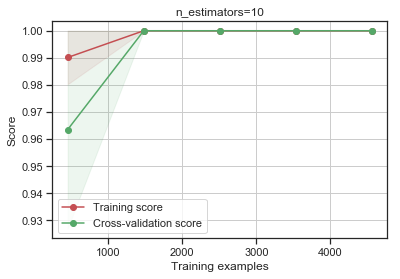

In [248]:
# Кривая обучения - Градиентный бустинг
plot_learning_curve(GradientBoostingClassifier(n_estimators=10, max_depth=3, learning_rate=0.0075), 'n_estimators=10', 
                    X_train, y_train, cv=2)

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

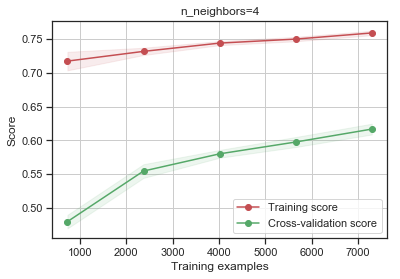

In [249]:
# Кривая обучения - Метод ближайших соседей
plot_learning_curve(KNeighborsClassifier(n_neighbors=4), 'n_neighbors=4', 
                    X_train, y_train, cv=StratifiedKFold(n_splits=5))

In [250]:
# Построение кривых валидации
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\foruniver\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and 

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

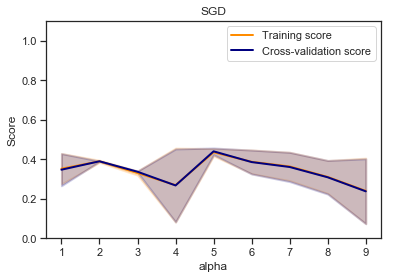

In [251]:
# Кривая валидации - Стохастический градиентный спуск
plot_validation_curve(SGDClassifier(alpha=0.5), 'SGD', 
                      X_train, y_train, 
                      param_name='alpha', param_range=n_range, 
                      cv=2, scoring="accuracy")

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

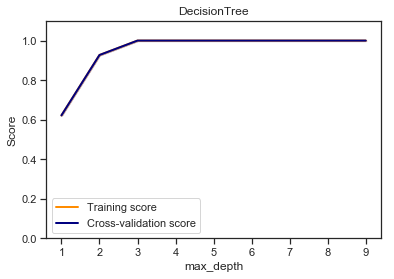

In [252]:
# Кривая валидации - Дерево решений
plot_validation_curve(DecisionTreeClassifier(random_state=1, min_impurity_decrease=0.1, max_depth=0.75), 'DecisionTree', 
                      X_train, y_train, 
                      param_name="max_depth", param_range=n_range, 
                      cv=2, scoring="accuracy")

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

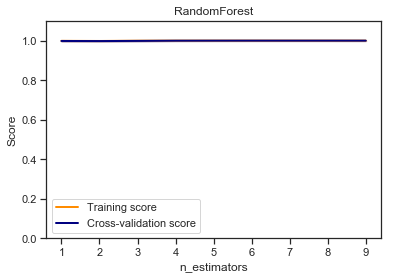

In [253]:
# Кривая валидации - Случайный лес
plot_validation_curve(RandomForestClassifier(n_estimators=10, max_depth=10, random_state=8), 'RandomForest', 
                      X_train, y_train, 
                      param_name='n_estimators', param_range=n_range, 
                      cv=2, scoring="accuracy")

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

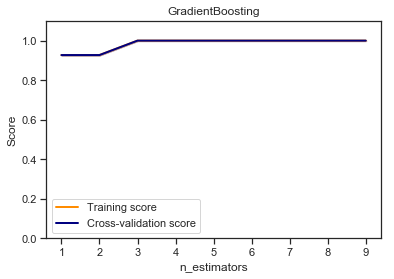

In [254]:
# Кривая валидации - Градиентный бустинг
plot_validation_curve(GradientBoostingClassifier(n_estimators=10, max_depth=3, learning_rate=0.025), 'GradientBoosting', 
                      X_train, y_train, 
                      param_name='n_estimators', param_range=n_range, 
                      cv=2, scoring="accuracy")

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

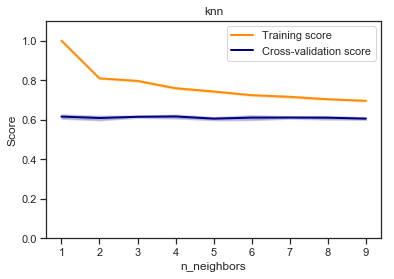

In [255]:
# Кривая валидации - Метод ближайших соседей
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      X_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=StratifiedKFold(n_splits=5), scoring="accuracy")